In [1]:
# Importing  the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('world_happiness_report_2021.csv')

In [3]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive (or zero, in six instances) width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

In [4]:
# Determining the null values
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

As there are no null values, let us determine which country is more happy

In [5]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [6]:
df.shape

(149, 20)

In [7]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

There are various features given in this dataset, however we can filter the only important features which can be used to 
detemine the happiness.The following are the most important features of the dataset, as the other features like Explained by: Log GDP per capita explains more about a particular feature

In [8]:
df = df[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy',
       'Freedom to make life choices','Generosity', 'Perceptions of corruption','Ladder score in Dystopia']]

In [9]:
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43


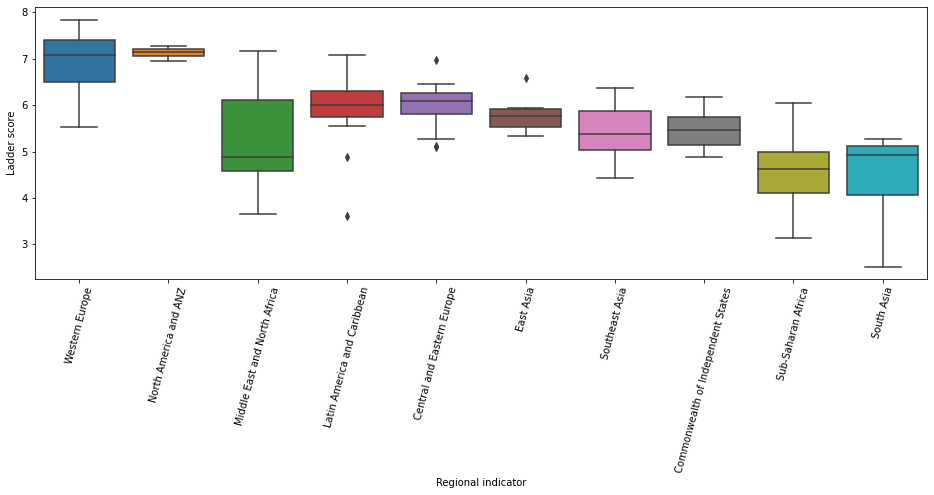

In [26]:
#a box plot to show any outliers in any of the feature

plt.figure(figsize=(16,5))
sns.boxplot(x=df['Regional indicator'] , y=df['Ladder score'])
plt.xticks(rotation=75)
plt.show()

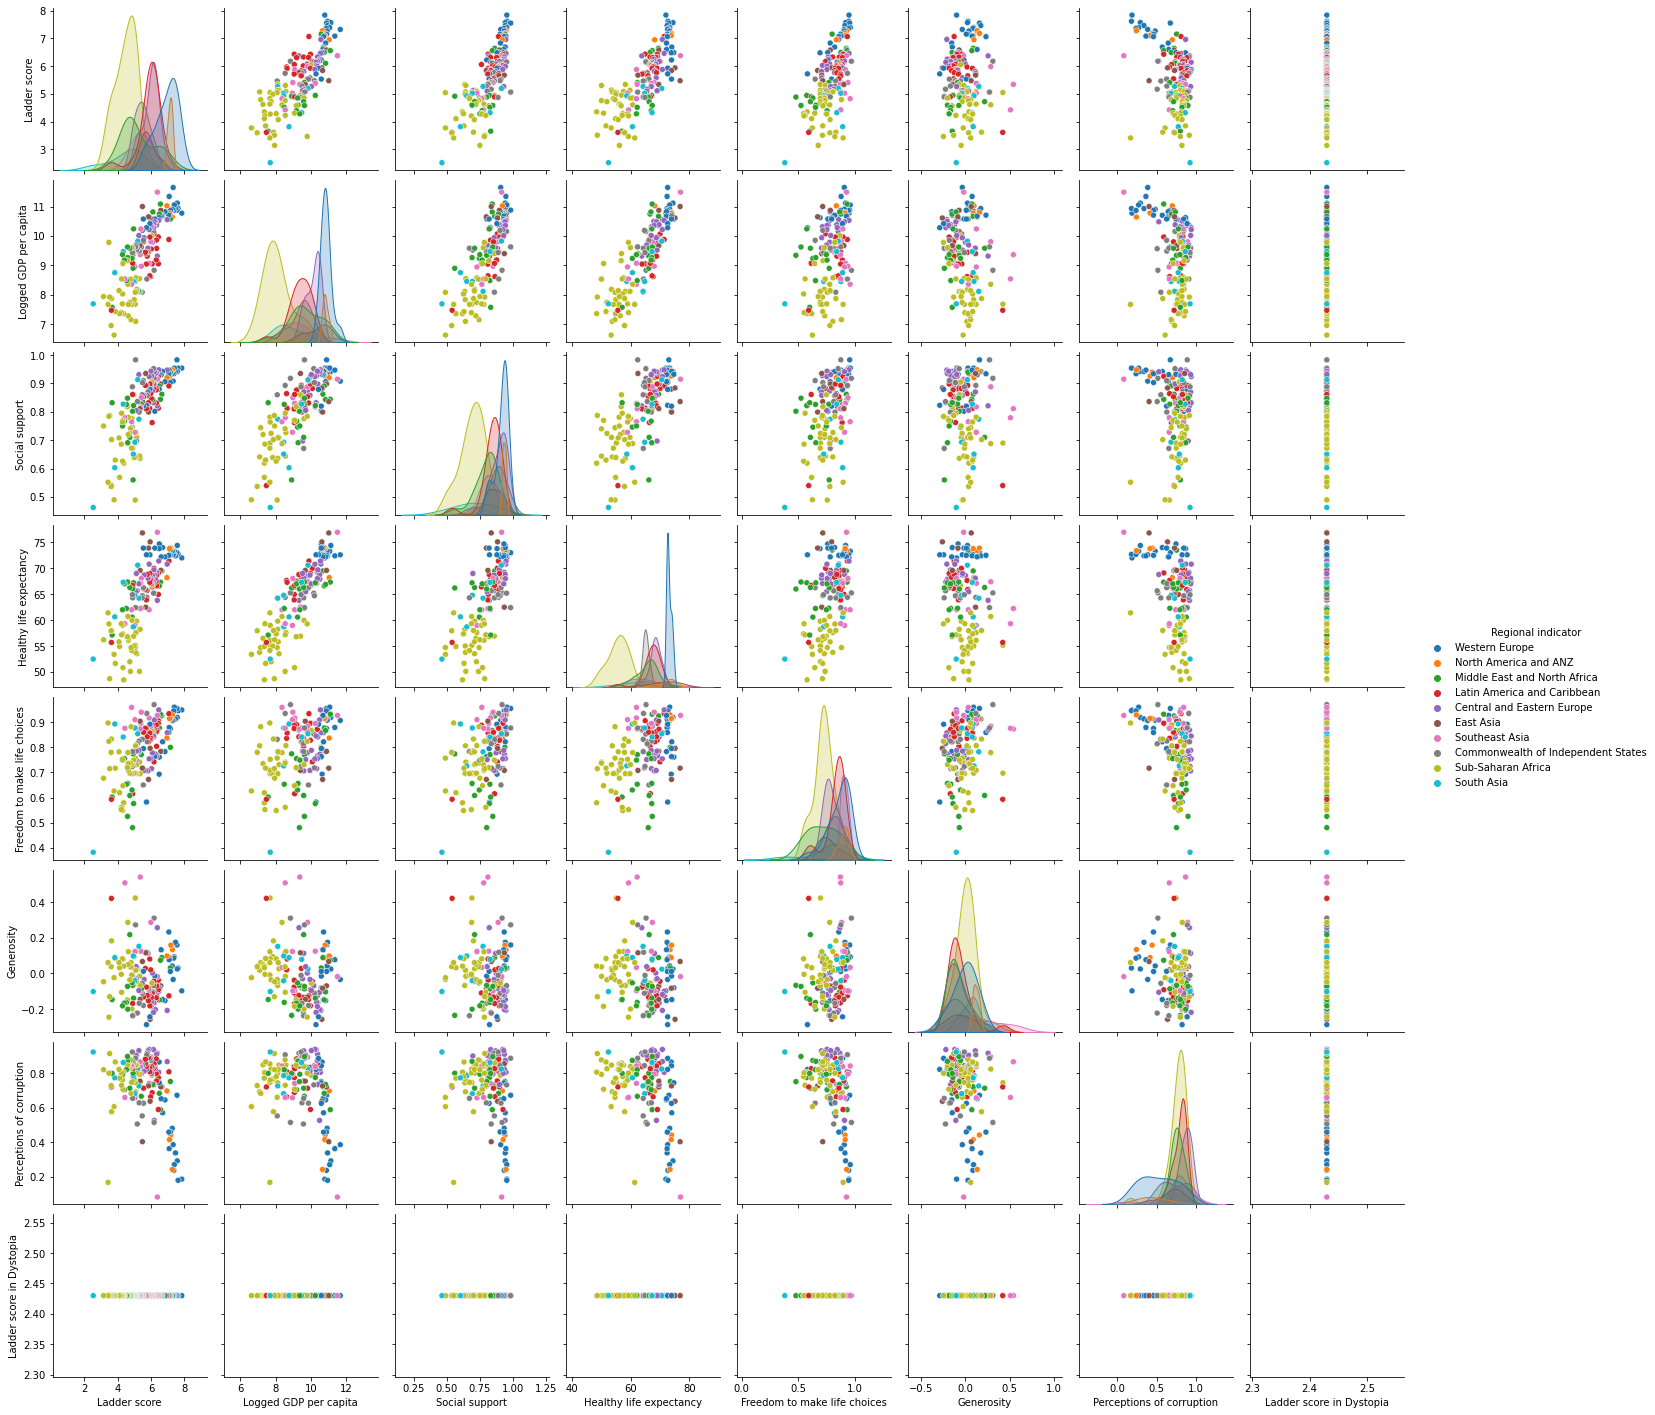

In [27]:
#Pairplot

sns.pairplot(df, height=2.5,hue='Regional indicator')

<AxesSubplot:>

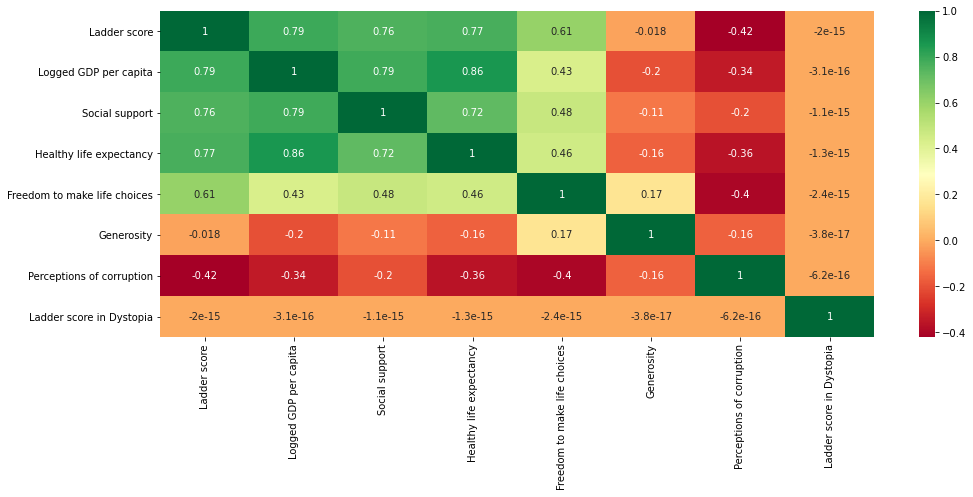

In [28]:
#corelation heatmap for comparision with Ladder score in Dystopia

corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(16,6))

sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

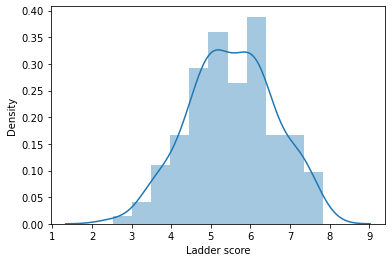

<Figure size 432x288 with 0 Axes>

In [29]:
#Plotting the skewness of all numeric variable

from scipy.stats import skew

sns.distplot(df['Ladder score'])
plt.figure()
plt.show()

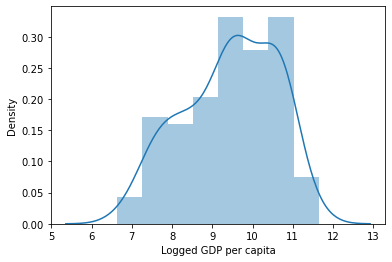

<Figure size 432x288 with 0 Axes>

In [30]:
sns.distplot(df['Logged GDP per capita'])
plt.figure()
plt.show()

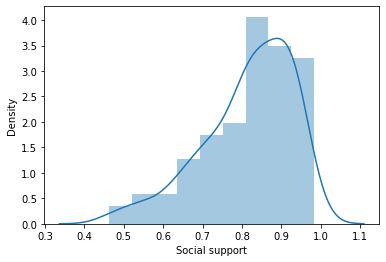

<Figure size 432x288 with 0 Axes>

In [31]:
sns.distplot(df['Social support'])
plt.figure()
plt.show()

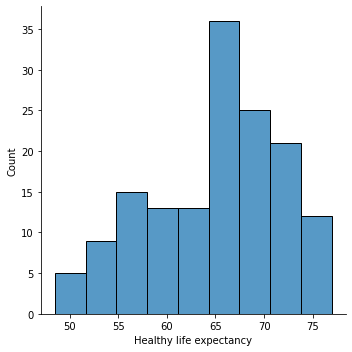

<Figure size 432x288 with 0 Axes>

In [32]:
sns.displot(df['Healthy life expectancy'])
plt.figure()
plt.show()

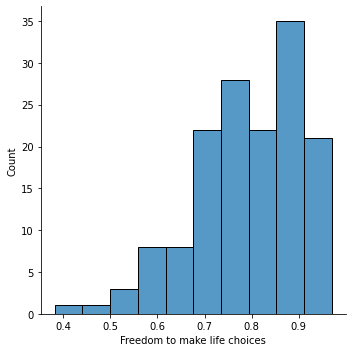

<Figure size 432x288 with 0 Axes>

In [33]:
sns.displot(df['Freedom to make life choices'])
plt.figure()
plt.show()

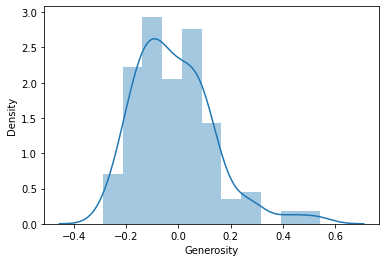

<Figure size 432x288 with 0 Axes>

In [34]:
sns.distplot(df['Generosity'])
plt.figure()
plt.show()

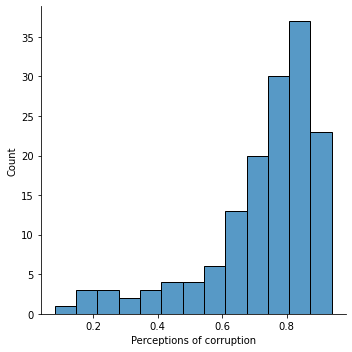

<Figure size 432x288 with 0 Axes>

In [35]:
sns.displot(df['Perceptions of corruption'])
plt.figure()
plt.show()

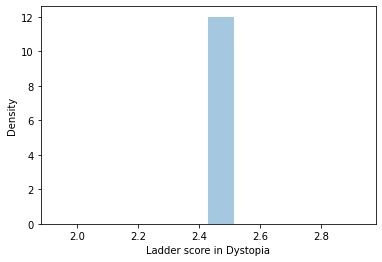

<Figure size 432x288 with 0 Axes>

In [36]:
sns.distplot(df['Ladder score in Dystopia'])
plt.figure()
plt.show()

In [10]:
#perfoming train test split

df.drop(['Country name','Regional indicator'], axis=1, inplace=True)

In [11]:
X = df.drop(['Ladder score'], axis = 1)
y = df['Ladder score']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 50)

In [13]:
# Import library for Linear Regression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [14]:
# Create a Linear regressor
lm = LinearRegression()

In [15]:
# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [17]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))


R^2: 0.7642002772593799
MAE: 0.39294804741105804
MSE: 0.2679513507590597


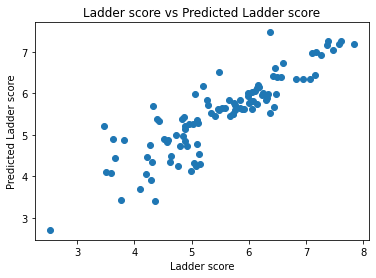

In [18]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Ladder score")
plt.ylabel("Predicted Ladder score")
plt.title("Ladder score vs Predicted Ladder score")
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model = DecisionTreeRegressor()

In [21]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
y_pred = model.predict(X_train)

In [23]:
print('R^2:',metrics.r2_score(y_train, y_pred))

R^2: 1.0


In [24]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [26]:
df.head()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43
1,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43
2,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43
3,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43
4,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43


In [27]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))


R^2: 0.9618882417815283
MAE: 0.15179855769230788
MSE: 0.04330835072980764


In [28]:
from sklearn.model_selection import cross_val_score

cv1_score = cross_val_score(reg,X_train,y_train, cv=5)

In [29]:
np.mean(cv1_score)

0.752309599828535

In [30]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [31]:
import xgboost as xg
from xgboost import XGBRegressor

In [32]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [33]:
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)
print('Training score:', score)

Training score: 0.9999993941200659


In [34]:
cv_score = cross_val_score(xgbr, X_train, y_train , cv=10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.6388934902400754


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
ypred =  xgbr.predict(X_test)
mse = mean_squared_error(y_test , ypred)
print('MSE :' , mse)


MSE : 0.3512015653982225


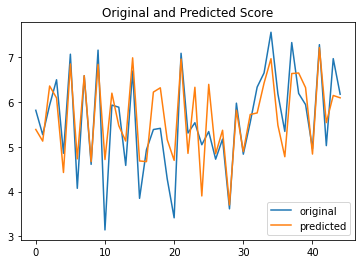

In [37]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, ypred , label='predicted')
plt.title('Original and Predicted Score')
plt.legend()
plt.show()

In [38]:
#SVM

from sklearn import svm

In [39]:
regressor = svm.SVR(kernel='linear', gamma='auto', C=2)
regressor.fit(X_train,y_train)

SVR(C=2, gamma='auto', kernel='linear')

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
score = regressor.score(X,y)
print('R-squared:', score)


R-squared: 0.7305906648591864
